# Student Job Placement Status (Data Analysis - Prediction)

#### By: Group 33 (Ashmit Gupta, Jolin Lin, Shikha Rajesh, Siddhanth Duggal, Yu Chang)

# 1. Introduction

*Need to add something here*

## Data Description

**Data Source:** The dataset has been taken from Kaggle (https://www.kaggle.com/datasets/ruchikakumbhar/placement-prediction-dataset/data) updated 2 months ago by Kaggle username 'ruchikakumbhar'. It is under the 'CC0: Public Domain' License so the Kaggle user does not endorse this dataset. This also means it is freely available for us to use.

**Data Description:** The dataset contains various columns about the academic performance and the placement status (secured a job after graduation or not) of students. Notably, it has the following features:
- Number of variables: 12
- Number of observations: 10,000
- Variable Information: Included in the following table

Variable Name              | Variable Type             | Variable Description
:------------------------- | :------------------------ | :-------------------
StudentID                  | Numerical (Double)        | Each student has been identified with a unique Student ID
CGPA                       | Numerical (Double)        | Overall grade of the student
Internships                | Numerical (Double)        | Total number of internships completed by the student
Projects                   | Numerical (Double)        | Total number of projects completed by the student
Workshops/Certifications   | Numerical (Double)        | Total number of online courses completed by the student
AptitudeTestScore          | Numerical (Double)        | Total aptitude test score of the student (Given to them as part of the recruitment process)
SoftSkillsRating           | Numerical (Double)        | Total score of the student in areas like communication
ExtracurricularActivities  | Categorical (Character)   | Score given to a student grading their extra curriculars (non academic activities)
PlacementTraining          | Categorical (Character)   | Denotes whether the student has or has not taken the job placement training given to them by their college
SSC_Marks                  | Numerical (Double)        | Total score of the student in Senior Secondary level
HSC_Marks                  | Numerical (Double)        | Total score of the student in High School level
PlacementStatus            | Categorical (Character)   | This denotes whether the student was or was not able to secure a job after graduation

## Question

**Question:** Can we predict whether a student will get placed or not (will be able to secure a job or not after graduation), given their academic performance (CGPA, Projects, AptitudeTestScore, SSC_Marks, HSC_Marks), extracuriccular achievements (Internships, Projects, Workshops/Certifications, SoftSkillsRating, ExtracurricularActivities) and training status (PlacementTraining)?

**Explanation:** The above question focuses on **prediction** as we are trying to predict the response variable (PlacementStatus), using other variables as predictors.

## Exploratory Data Analysis

In [ ]:
# Main developer: Ashmit Gupta

# Loading necessary libraries
library(tidyverse)
library(broom)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Main developer: Ashmit Gupta

# Downloading the dataset
download.file("https://raw.githubusercontent.com/AshmitGupta/Kaggle-Placement-Data/refs/heads/main/placementdata.csv", destfile = "placement.csv")

In [3]:
# Main developer: Ashmit Gupta

# Loading the dataset into R
placement_data <- read_csv("placement.csv", show_col_types = FALSE)
head(placement_data)

StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
6,7.0,0,2,2,71,4.2,Yes,No,55,66,NotPlaced


In [4]:
# Main developer: Ashmit Gupta

# Checking if there are any duplicates
duplicate_values <- placement_data %>% 
                    group_by(StudentID) %>% 
                    summarise(value_count = n()) %>%
                    filter(value_count > 1)
                    
duplicate_values

StudentID,value_count
<dbl>,<int>


Hence, there are no duplicates that we need to remove. Next, we will drop the StudentID column since this variable definitely won't be useful in our prediction.

In [5]:
# Main developer: Ashmit Gupta

# Dropping the column StudentID
clean_placement_data <- placement_data %>%
                        select(- StudentID)

In [6]:
# Main developer: Ashmit Gupta

# Checking if dataset has any NA values
possible_na_values <- clean_placement_data %>%
                      drop_na()

nrow(possible_na_values)

[1] 10000

Since the number of observations are still 10,000, this means the dataset contains no rows with any NA values

#### Categorical Variables
- I will check the counts of all the classes of the categorical variables (ExtracurricularActivities, PlacementTraining) being used as covariates.
- I will also check the counts of classes for our response variable (PlacementStatus) to ensure there is no class imbalance

In [7]:
# Main developer: Ashmit Gupta

# Checking the counts of each category for each categorical variable
values_extracurricular <- clean_placement_data %>%
                          group_by(ExtracurricularActivities) %>%
                          summarise(value_count = n())

values_placement_training <- clean_placement_data %>%
                          group_by(PlacementTraining) %>%
                          summarise(value_count = n())

values_placement_status <- clean_placement_data %>%
                          group_by(PlacementStatus) %>%
                          summarise(value_count = n())

values_extracurricular
values_placement_training
values_placement_status

ExtracurricularActivities,value_count
<chr>,<int>
No,4146
Yes,5854


PlacementTraining,value_count
<chr>,<int>
No,2682
Yes,7318


PlacementStatus,value_count
<chr>,<int>
NotPlaced,5803
Placed,4197


- There are enough values in both the categorical predictor variables for each of their categories such that there is no reason to merge or drop come categories.
- For the response variable (PlacementStatus), there is no class imbalance, so no further tidying is required in this aspect.

#### Numerical Variables
- I will create a boxplot of the numerical covariates (CGPA, HSC_Marks, SSC_Marks, AptitudeTestScore, SoftSkillsRating)
- This, notably, excludes 3 numerical columns: Internships, Projects and Workshops/Certifications. This is because these columns have only descretised values, which are 0, 1, 2 or 3. Hence, their range, standard deviation and mean would differ a lor from the other numerical variables and thus won't look well on a single plot. Maybe in the future, we could even convert these column into 'factor' type (categorical variables) if it leads to better prediction.
- For the visualisation now, we will scale CGPA and SoftSkillsRating to be on the same scale
  - We will multiply CGPA by 10 to shift its range from 0-10 to 0-100
   - We will multiply SoftSkillsRating by 20 to shift its range 0-5 to 0-100 <br> This is done so a good comparison can be made visually by just looking at the plot.

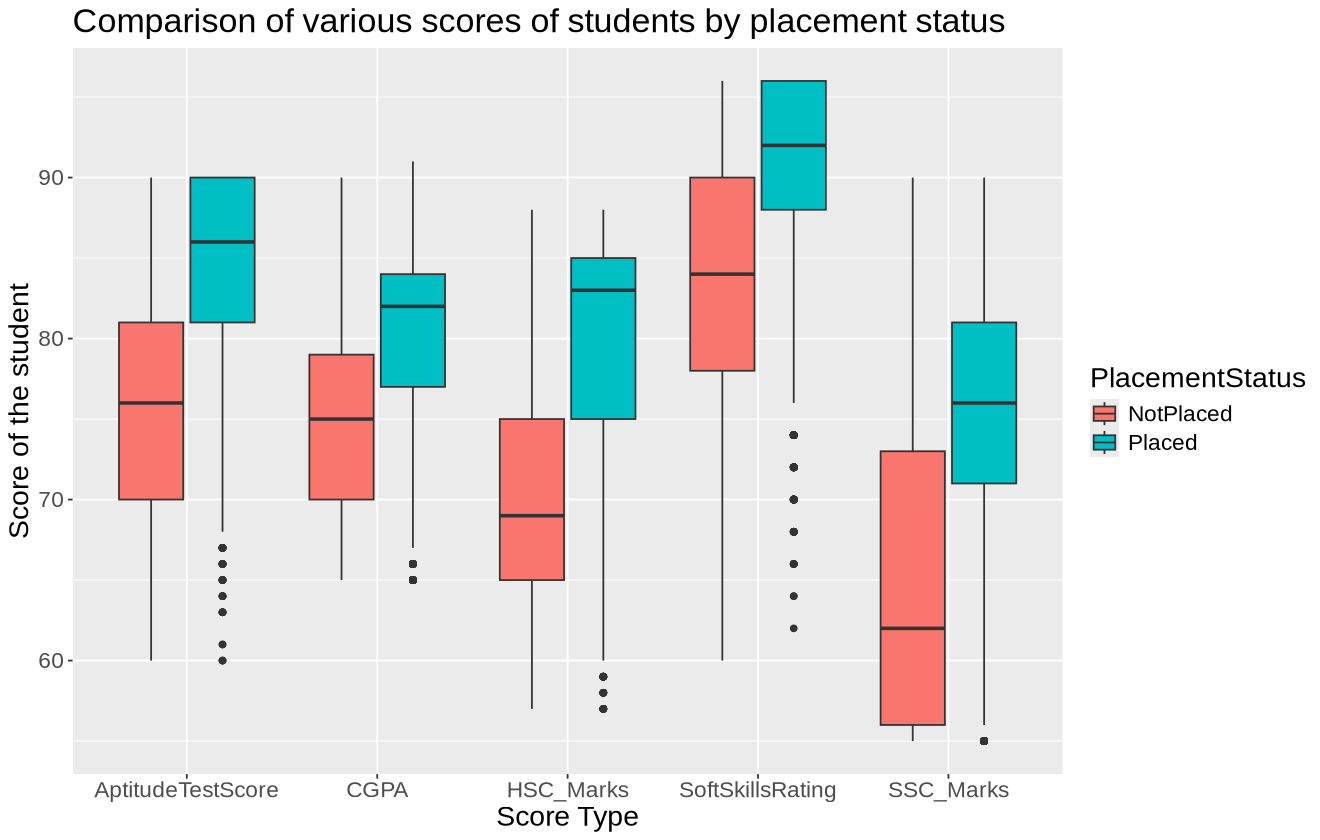

In [8]:
# Main developer: Ashmit Gupta

options(repr.plot.width = 11, repr.plot.height = 7)
marks_data <- clean_placement_data %>%
              mutate(CGPA = CGPA * 10, SoftSkillsRating = SoftSkillsRating * 20) %>% # Scaling CGPA and SoftSkillsRating to be from 1 to 100
              pivot_longer(cols = c(CGPA, HSC_Marks, SSC_Marks, AptitudeTestScore, SoftSkillsRating), 
                           names_to = "Score_Type", 
                           values_to = "Score")

marks_visualisation <- marks_data %>%
                       ggplot(aes(x = Score_Type, y = Score, fill = PlacementStatus)) +
                       geom_boxplot() +
                       ggtitle("Comparison of various scores of students by placement status") +
                       labs(x = "Score Type", y = "Score of the student") +
                       theme(text = element_text(size = 17))
                       
marks_visualisation

This graph is relevant to my research question as it shows the distribution of various possible predictors against the response variable (PlacementStatus). It shows that in general, the students who are placed tend to have a higher median score in the respective academic (or soft skill) category compared to the students who did not get placed.

## References
- Dataset has downloaded from Kaggle (https://www.kaggle.com/datasets/ruchikakumbhar/placement-prediction-dataset/data)
- All the information (like data description, number of variables, number of observations, variable name, variable type and variable description) in the main 'Data Description' section has been adapted from https://www.kaggle.com/datasets/ruchikakumbhar/placement-prediction-dataset/data